In [25]:
import pandas as pd
import numpy as np
import matplotlib as pl
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
data = pd.read_csv("./churn_dataset.csv/churn_dataset.csv")

In [27]:
data.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005


In [28]:
data.shape

(100000, 100)

In [29]:
data.dtypes.unique()

array([dtype('float64'), dtype('int64'), dtype('O')], dtype=object)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     10

# Посмотрим на целевую переменную

In [31]:
data.churn.value_counts()
# Примерно одинаковое количество элементов

0    50438
1    49562
Name: churn, dtype: int64

In [32]:
# All string columns
obj_col = list(data.select_dtypes(['object']).columns)
print(len(obj_col))
data[obj_col]

21


,new_cell,crclscod,asl_flag,prizm_social_one,area,dualband,refurb_new,hnd_webcap,ownrent,dwlltype,...,infobase,HHstatin,dwllsize,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd
0,U,A,N,S,NORTHWEST/ROCKY MOUNTAIN AREA,Y,N,WCMB,O,S,...,M,C,A,N,U,U,U,U,U,Y
1,N,EA,N,U,CHICAGO AREA,N,N,WC,NaN,S,...,M,C,A,Z,U,U,U,U,U,Y
2,Y,C,N,S,GREAT LAKES AREA,N,N,NaN,O,S,...,M,C,A,N,U,Y,U,U,U,Y
3,Y,B,N,T,CHICAGO AREA,N,N,NaN,NaN,M,...,M,C,D,U,Y,U,U,U,U,Y
4,Y,A,N,U,NEW ENGLAND AREA,Y,N,WCMB,R,M,...,M,C,O,I,U,U,U,U,U,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,U,B,N,U,LOS ANGELES AREA,N,N,WC,O,S,...,M,NaN,A,S,U,U,U,Y,U,Y
99996,U,CY,Y,S,LOS ANGELES AREA,N,N,WC,O,S,...,M,I,A,N,U,U,Y,Y,Y,Y
99997,U,DA,N,U,SOUTHWEST AREA,Y,N,WCMB,NaN,NaN,...,M,NaN,NaN,U,Y,Y,U,U,U,N
99998,U,EA,N,U,SOUTHWEST AREA,Y,N,WCMB,NaN,NaN,...,NaN,NaN,NaN,S,U,U,U,U,U,N


# Find and count all NaN values

[357, 357, 357, 357, 357, 357, 357, 357, 357, 891, 891, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2839, 2839, 2839, 7388, 40, 1, 1, 847, 1, 1, 10189, 1732, 1732, 33706, 30190, 31909, 1732, 23019, 22079, 25436, 49366, 37923, 38308, 1732, 1732, 1732, 1732, 1732, 1732, 1732, 1732, 1, 0]


<BarContainer object of 100 artists>

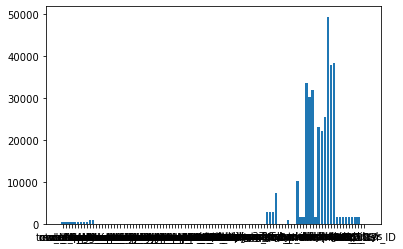

In [33]:
none_counts = []
for item in data.columns:
    none_counts.append(data[item].isna().sum())
print(none_counts)
plt.bar(data.columns, none_counts)

In [34]:
obj_col

['new_cell',
 'crclscod',
 'asl_flag',
 'prizm_social_one',
 'area',
 'dualband',
 'refurb_new',
 'hnd_webcap',
 'ownrent',
 'dwlltype',
 'marital',
 'infobase',
 'HHstatin',
 'dwllsize',
 'ethnic',
 'kid0_2',
 'kid3_5',
 'kid6_10',
 'kid11_15',
 'kid16_17',
 'creditcd']

# One hot encoding

In [35]:
data = pd.get_dummies(data)

In [36]:
data.shape

(100000, 232)

[357, 357, 357, 357, 357, 357, 357, 357, 357, 891, 891, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2839, 2839, 2839, 847, 1, 1, 1732, 1732, 30190, 23019, 25436, 49366, 1732, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


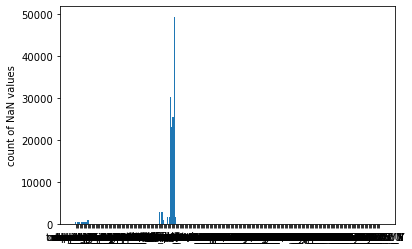

In [37]:
none_counts = []
for item in data.columns:
    none_counts.append(data[item].isna().sum())
print(none_counts)
plt.bar(data.columns, none_counts)
plt.ylabel('count of NaN values')
plt.show()

In [38]:
ind_of_max_none = none_counts.index(max(none_counts))
column_lots_of_none = data.columns[75]
print(data[column_lots_of_none].dtype)
data[column_lots_of_none].describe()

float64


count    50634.000000
mean         1.567563
std          0.625456
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: numbcars, dtype: float64

In [39]:
data.iloc[:,:90].describe()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,new_cell_U,new_cell_Y,crclscod_A,crclscod_A2,crclscod_A3,crclscod_AA,crclscod_B,crclscod_B2,crclscod_BA,crclscod_C
count,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99109.000000,...,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,58.719985,513.559937,46.179136,0.888828,41.072247,13.559560,13.295062,0.261318,1.286405,-13.933818,...,0.669140,0.193010,0.16996,0.00861,0.000030,0.365090,0.041100,0.001090,0.126670,0.014560
std,46.291677,525.168140,23.623489,2.177619,97.296150,30.500885,30.056089,3.126531,14.711374,276.087509,...,0.470525,0.394663,0.37560,0.09239,0.005477,0.481458,0.198523,0.032997,0.332605,0.119784
min,-6.167500,0.000000,-26.915000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3875.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.260000,150.750000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-87.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.195000,355.500000,44.990000,0.247500,2.750000,1.000000,0.682500,0.000000,0.000000,-6.250000,...,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,70.750000,703.000000,59.990000,0.990000,42.000000,14.437500,14.025000,0.000000,0.235000,63.000000,...,1.000000,0.000000,0.00000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,3843.262500,12206.750000,409.990000,159.390000,4320.750000,1102.400000,896.087500,423.540000,3685.200000,31219.250000,...,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
# Create a new column 'numbcars_NaN'
# If there is no value in the "numbcars" column, then = 0 and yes value = 1
column_max_none = data.columns[ind_of_max_none]
data[column_max_none+'_NaN'] = np.where(data[column_max_none].isnull(), 0,1)

In [41]:
data[[column_max_none,column_max_none+'_NaN' ]]

,numbcars,numbcars_NaN
0,3.0,1
1,1.0,1
2,2.0,1
3,1.0,1
4,1.0,1
...,...,...
99995,2.0,1
99996,2.0,1
99997,NaN,0
99998,NaN,0


In [42]:
data['numbcars_NaN'].value_counts()

1    50634
0    49366
Name: numbcars_NaN, dtype: int64

In [43]:
# Churn passengers by 'numbcars_NaN'
data.groupby(['numbcars_NaN']) ['churn'].value_counts(normalize=True)

numbcars_NaN  churn
0             1        0.502330
              0        0.497670
1             0        0.510922
              1        0.489078
Name: churn, dtype: float64

In [44]:
# drop numbcars and numbcars_NaN
data = data.drop(['numbcars_NaN','numbcars'],axis=1)

[357, 357, 357, 357, 357, 357, 357, 357, 357, 891, 891, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2839, 2839, 2839, 847, 1, 1, 1732, 1732, 30190, 23019, 25436, 1732, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


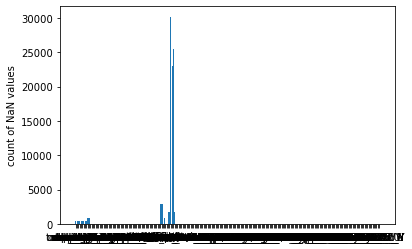

In [45]:
none_counts = []
for item in data.columns:
    none_counts.append(data[item].isna().sum())
print(none_counts)
plt.bar(data.columns, none_counts)
plt.ylabel('count of NaN values')
plt.show()

Lets look at NaN of other columns, where lots of missed values 

In [46]:
Nan_ind1 = none_counts.index(30190)
Nan_ind2 = none_counts.index(23019)
Nan_ind3 = none_counts.index(25436)

In [47]:
# create Nan columns
column_max_none1 = data.columns[Nan_ind1]
column_max_none2 = data.columns[Nan_ind2]
column_max_none3 = data.columns[Nan_ind3]
data[column_max_none1+'_NaN'] = np.where(data[column_max_none1].isnull(), 0,1)
data[column_max_none2+'_NaN'] = np.where(data[column_max_none2].isnull(), 0,1)
data[column_max_none3+'_NaN'] = np.where(data[column_max_none3].isnull(), 0,1)

In [49]:
print(data[column_max_none1+'_NaN'].value_counts())
print(data[column_max_none2+'_NaN'].value_counts())
print(data[column_max_none3+'_NaN'].value_counts())

1    69810
0    30190
Name: lor_NaN, dtype: int64
1    76981
0    23019
Name: adults_NaN, dtype: int64
1    74564
0    25436
Name: income_NaN, dtype: int64


In [171]:
# Churn passengers by 'numbcars_NaN'
print(data.groupby([column_max_none1+'_NaN']) ['churn'].value_counts(normalize=True))
print(data.groupby([column_max_none2+'_NaN']) ['churn'].value_counts(normalize=True))
print(data.groupby([column_max_none3+'_NaN']) ['churn'].value_counts(normalize=True))

lor_NaN  churn
0        1        0.513581
         0        0.486419
1        0        0.512147
         1        0.487853
Name: churn, dtype: float64
adults_NaN  churn
0           1        0.517181
            0        0.482819
1           0        0.510827
            1        0.489173
Name: churn, dtype: float64
income_NaN  churn
0           1        0.514350
            0        0.485650
1           0        0.510769
            1        0.489231
Name: churn, dtype: float64


In [50]:
data.shape

(100000, 234)

In [51]:
data.drop([column_max_none1+'_NaN',column_max_none2+'_NaN',column_max_none3+'_NaN',
          column_max_none1,column_max_none2,column_max_none3],axis=1, inplace=True)

In [52]:
data.shape

(100000, 228)

In [79]:
names_area = list(map(str, data.area.unique().tolist()))
count_area = list(map(int,data.area.value_counts().to_list()))

In [122]:
print(type(names_area), type(count_area))
print(type(names_area[0]), type(count_area[0]))
for i in names_area:
    print(i,len(i), type(i))
    
print()
for i in count_area:
    print(i, type(i))

<class 'list'> <class 'list'>
<class 'str'> <class 'int'>
NORTHWEST/ROCKY MOUNTAIN AREA 29 <class 'str'>
CHICAGO AREA 12 <class 'str'>
GREAT LAKES AREA 16 <class 'str'>
NEW ENGLAND AREA 16 <class 'str'>
DALLAS AREA 11 <class 'str'>
CENTRAL/SOUTH TEXAS AREA 24 <class 'str'>
TENNESSEE AREA 14 <class 'str'>
MIDWEST AREA 12 <class 'str'>
PHILADELPHIA AREA 17 <class 'str'>
OHIO AREA 9 <class 'str'>
HOUSTON AREA 12 <class 'str'>
SOUTHWEST AREA 14 <class 'str'>
NEW YORK CITY AREA 18 <class 'str'>
ATLANTIC SOUTH AREA 19 <class 'str'>
SOUTH FLORIDA AREA 18 <class 'str'>
CALIFORNIA NORTH AREA 21 <class 'str'>
DC/MARYLAND/VIRGINIA AREA 25 <class 'str'>
NORTH FLORIDA AREA 18 <class 'str'>
nan 3 <class 'str'>
LOS ANGELES AREA 16 <class 'str'>

11098 <class 'int'>
6636 <class 'int'>
6567 <class 'int'>
6346 <class 'int'>
6187 <class 'int'>
6132 <class 'int'>
5913 <class 'int'>
5452 <class 'int'>
5426 <class 'int'>
5141 <class 'int'>
4649 <class 'int'>
4580 <class 'int'>
4350 <class 'int'>
4341 <class

In [87]:
print(len(names_area), len(count_area))

20 19


In [102]:
ind = none_counts.index(10189)
print(data.columns[ind])


hnd_webcap


In [121]:
tmp = data[~data['area'].isnull()]


0        NORTHWEST/ROCKY MOUNTAIN AREA
1                         CHICAGO AREA
2                     GREAT LAKES AREA
3                         CHICAGO AREA
4                     NEW ENGLAND AREA
                     ...              
99995                 LOS ANGELES AREA
99996                 LOS ANGELES AREA
99997                   SOUTHWEST AREA
99998                   SOUTHWEST AREA
99999                 LOS ANGELES AREA
Name: area, Length: 99960, dtype: object

In [124]:
len(tmp.area)

99960

<BarContainer object of 19 artists>

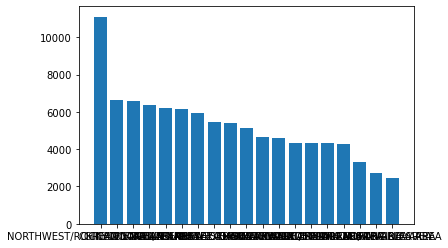

In [125]:
plt.bar(x=tmp.area.unique(), height=tmp.area.value_counts())